In [131]:
!pip install tensorflow
!pip install keras

In [132]:
#importing all the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [133]:
#reading heart disease classification dataset. Please refer this documentation: /content/data/documentation.pdf
df = '/content/heart.csv'
df = pd.read_csv(df)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


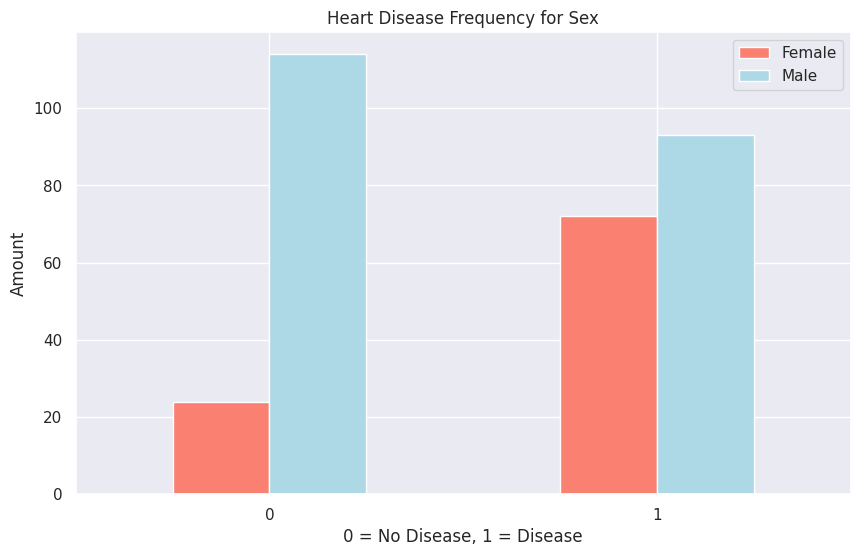

In [208]:
# Create a plot
pd.crosstab(df.output, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

In [134]:
#extracting input and output data from the training dataset
#excluding all column, except a last one
X = df.iloc[:, :-1]
#excluding only the last column
y = df.iloc[:, -1]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [135]:
#1190 samples and 11 features
print(X.shape)
#binary targets
print(y.shape)


(303, 13)
(303,)


In [136]:
#splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

In [137]:
#input layer: 11 input features
#hidden layer1: 16 nodes (using ReLU activation function)
#output layer: 2 classes (using sigmoid because it's a classification problem)

#defining the MLP model
mlp_cl = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(13,), name="Input_layer"),
    tf.keras.layers.Dense(16, activation='relu', name="Hidden_layer"),
    tf.keras.layers.Dense(1, activation='sigmoid', name="Output_layer")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


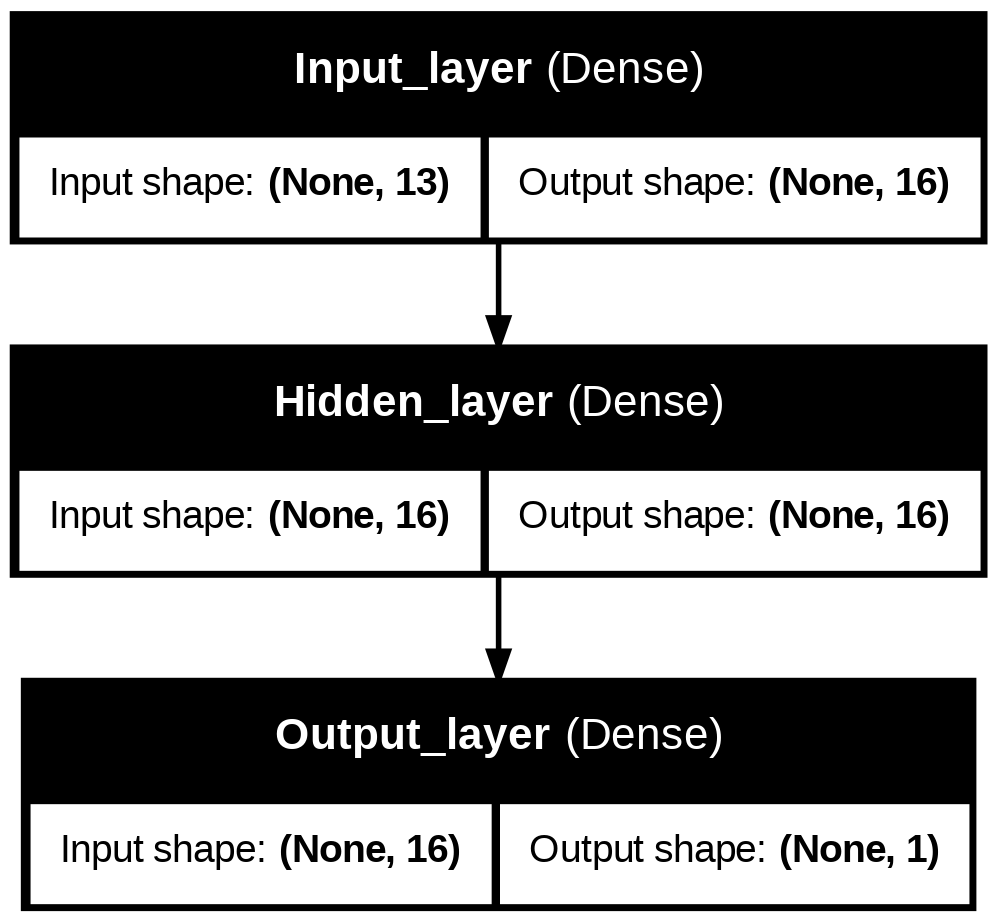

In [138]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(mlp_cl, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [139]:
mlp_cl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'] )


In [205]:
#training the model
mlp_cl.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9816 - loss: 0.0456 - val_accuracy: 0.7551 - val_loss: 0.7947
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9741 - loss: 0.0576 - val_accuracy: 0.7551 - val_loss: 0.8043
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9748 - loss: 0.0572 - val_accuracy: 0.7551 - val_loss: 0.8129
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9775 - loss: 0.0524 - val_accuracy: 0.7551 - val_loss: 0.8128
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9834 - loss: 0.0498 - val_accuracy: 0.7551 - val_loss: 0.8074
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9765 - loss: 0.0547 - val_accuracy: 0.7551 - val_loss: 0.8064
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9783 - loss: 0.0538 - val_accuracy: 0.7551 - val_loss: 0.8071
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9782 - loss: 0.0489 - val_accuracy: 0.7551 - val_loss: 0.8084


In [201]:
#evaluating the model (after training, evaluate the mlp_cl model on the test set (X_test, y_test) to see how well the model is performing)
loss, accuracy = mlp_cl.evaluate(X_test, y_test)
print(f"test accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6241 - loss: 4.6666
test accuracy: 0.6393


In [202]:
#making predictions
predictions = mlp_cl.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted classes", predicted_classes.flatten())

print("True Output", list(y.head(50)))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted classes [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1]
True Output [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


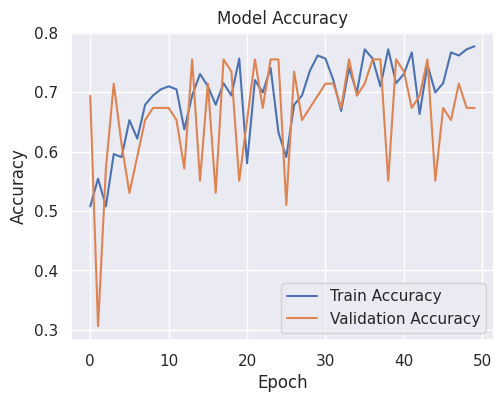

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [173]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = mlp_cl.predict(X_test)
y_test_class = y_test
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        28
           1       0.00      0.00      0.00        33

    accuracy                           0.46        61
   macro avg       0.23      0.50      0.31        61
weighted avg       0.21      0.46      0.29        61

[[28  0]
 [33  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


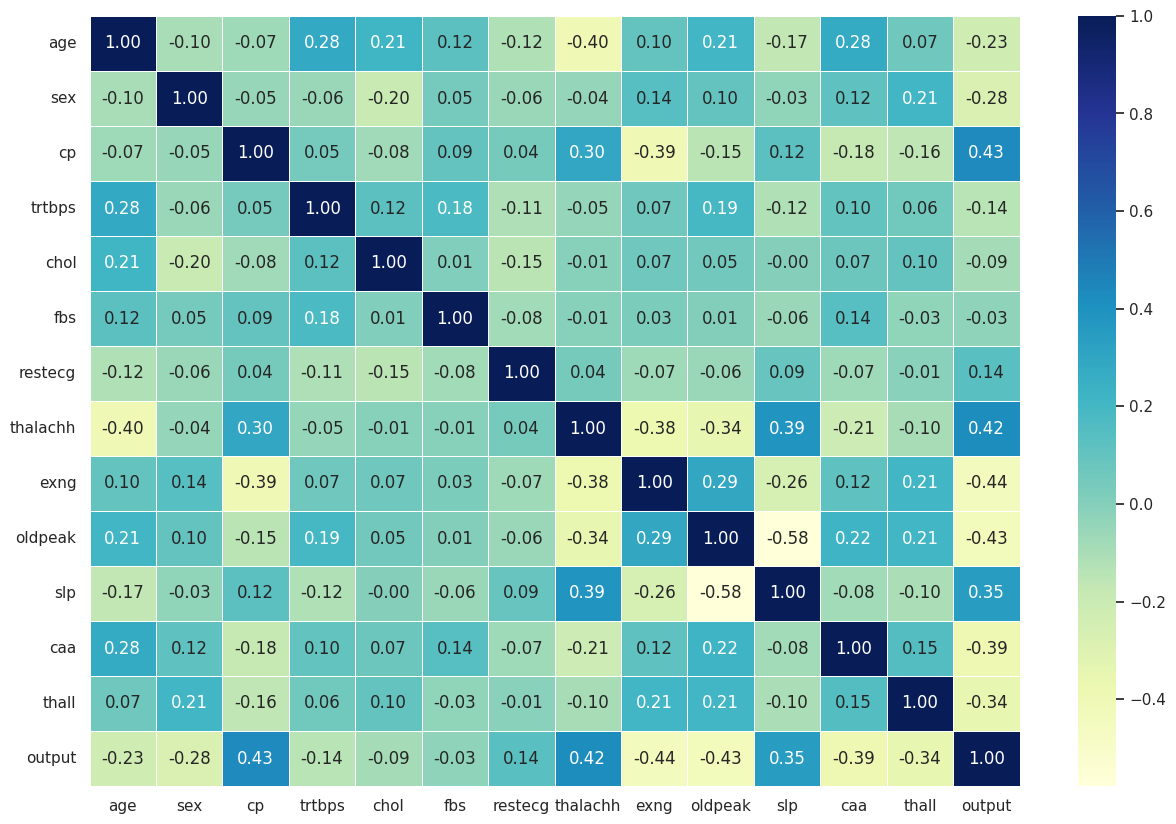

In [204]:
import seaborn as sns # seaborn gets shortened to sns
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

In [188]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


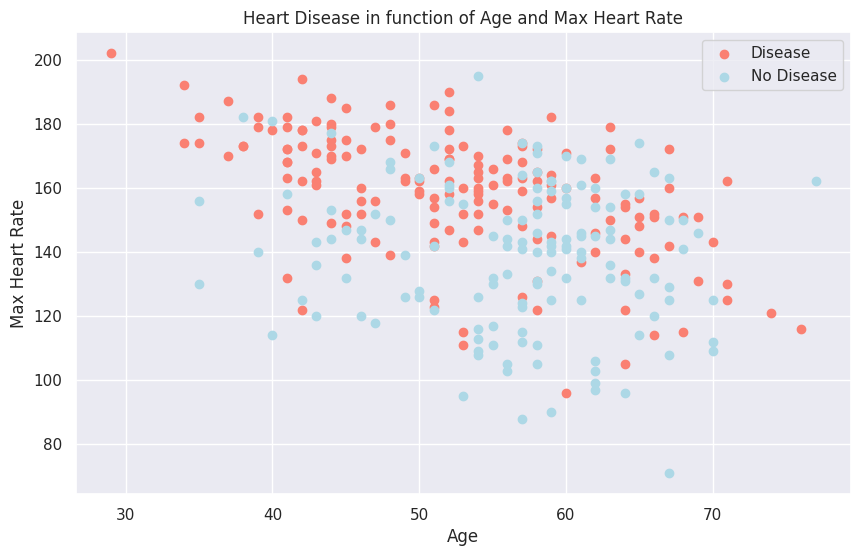

In [194]:

# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.output==1],
            df.thalachh[df.output==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.output==0],
            df.thalachh[df.output==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);